# Data science in Python

## Session 2.4: Data project report in Jupyter



For the 4 species gff files store in the `data/` folder (mouse: `GRCm38.gff3`, human: `GRCh38.gff3`, zebrafish: `GRCz11.gff3` and panda: `AilMel.gff3`), load these files into a DataFrame, filter the exons, and calculate their length, their GC content as well as their molecular weigth. Store these calculations into new columns in their respective DataFrame. Plot these three values for the four species onto three graphs using a boxplot.

Start by working with the mouse data for exploratory analysis, working through the problem steps by steps. Then, create a re-usable function to apply the analysis onto all datasets. Load all four datasets and apply the newly created function to calculate the new values. After having all DataFrames with the new three columns, visualise the data onto three boxplot graphs.

Present the results into a Jupyter notebook, using Pandas, Matplotlib and Biopython. Write reusable and modular code as much as possible using functions.

Have fun!

In [69]:
import pandas as pd
from Bio import SeqIO
from Bio import Entrez
from Bio.SeqUtils import GC, molecular_weight

In [101]:
def get_gc_and_mw_from_gbid(input_id):
    Entrez.email = 'A.N.Other@example.com' # Always tell NCBI who you are
    handle = Entrez.efetch(db="nucleotide", id=input_id, rettype="gb")
    seq_record = SeqIO.read(handle, "gb")
    #print('GC = {0}, MW = {1}'.format(GC(seq_record.seq), molecular_weight(seq_record.seq)))
    return GC(seq_record.seq), molecular_weight(seq_record.seq)

In [103]:
data = pd.read_csv('data/GRCm38.gff3',sep='\t')
# add length column
data["length"]=data["end"]-data["start"] + 1

#print(data.info())
data.dropna(inplace = True)

# filter exons
exons_full = data[data["type"]== "exon" ]
exons = data[data["type"]== "exon" ].loc[:30]
print(exons.info())

#exons["GC"][0] = get_gc_and_mw_from_gbid(exons["gbid"][0])

GC_list=[]
MW_list=[]

gbId_list = exons[:]['gbid']

for gb in gbId_list:
    GC_list.append(get_gc_and_mw_from_gbid(gb)[0])
    MW_list.append(get_gc_and_mw_from_gbid(gb)[1])
    
#print(GC_list)
#     print(get_gc_and_mw_from_gbid(gb)[0])
#print(exons[:1]['gbid'])
#get_gc_and_mw_from_gbid(exons[:1]['gbid'])

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17 entries, 2 to 28
Data columns (total 11 columns):
seqid         17 non-null object
source        17 non-null object
type          17 non-null object
start         17 non-null int64
end           17 non-null int64
score         17 non-null object
strand        17 non-null object
phase         17 non-null object
attributes    17 non-null object
gbid          17 non-null object
length        17 non-null int64
dtypes: int64(3), object(8)
memory usage: 1.6+ KB
None


KeyError: 0

In [97]:
new_data= pd.DataFrame({"gbid": exons[:]['gbid'],"length" : exons[:]['length'], "GC" : GC_list, "MW" : MW_list})
print(new_data)

           GC            MW            gbid  length
2   52.097378  8.293107e+05     NM_177676.6     245
3   57.063197  2.164587e+06  XM_017312883.1      79
7   49.659864  3.169640e+05     XR_378454.2     127
8   50.390277  8.345749e+06  XM_017314047.1     207
9   56.730498  4.384230e+06  XM_017317334.1     144
13  46.465753  5.642921e+05  XM_006532761.3      56
14  55.591398  2.891971e+05     NM_027263.2      67
15  45.536481  1.441759e+06  NM_001079690.1     112
16  48.575111  2.157642e+06     NM_010078.3      66
18  39.162791  3.328927e+05  XM_006512605.3      99
19  56.192632  2.456914e+06     NM_182698.2     236
21  48.838448  4.640921e+06  XM_017312594.1      92
23  49.389396  1.999890e+06  NM_001286419.1     283
24  38.499218  2.967117e+06  XR_001783656.1     199
25  51.780822  2.266795e+05     XR_376954.1     683
26  50.027005  2.285647e+06  XM_006510062.1    3430
28  47.974709  1.565996e+06  XM_006527477.3     108


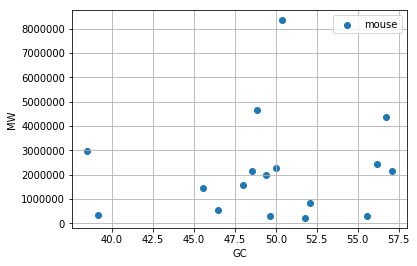

In [99]:
%matplotlib inline

import matplotlib.pyplot as mpyplot


mpyplot.scatter(new_data['GC'], new_data['MW'],label='mouse')
mpyplot.xlabel('GC')
mpyplot.ylabel('MW')
mpyplot.legend()
mpyplot.grid(True)
mpyplot.show()

In [ ]:
import pandas as pd
from Bio import SeqIO
from Bio.SeqUtils import GC

In [ ]:
data = pd.read_csv('data/GRCm38.gff3',sep='\t')

In [ ]:
data.info()
# incomplete data for gbid gene bank id

In [ ]:
data.isna().sum()

In [ ]:
data.dropna(inplace = True)
# remove entries with NA

In [ ]:
data.info()

In [ ]:
data.iloc[0]

In [ ]:
# # Read FASTA file from NCBI GenBank
# from Bio import Entrez
# Entrez.email = 'A.N.Other@example.com' # Always tell NCBI who you are
# handle = Entrez.efetch(db="nucleotide", id=data.iloc[0]['gbid'], rettype="gb")
# seq_record = SeqIO.read(handle, "gb")
# print(seq_record.seq)

In [ ]:
#from Bio import Entrez
from Bio.SeqUtils import GC

gbId_5 = data[:5]['gbid']

for gb in gbId_5:
    #print(gb)
    Entrez.email = 'A.N.Other@example.com' # Always tell NCBI who you are
    handle = Entrez.efetch(db="nucleotide", id=gb, rettype="gb")
    seq_record = SeqIO.read(handle, "gb")
    #print(seq_record.seq)
    print('SeqId = {0}, GC = {1}'.format(seq_record.id, GC(seq_record.seq)))